In [91]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib as plt

In [83]:
# determine the penalty for RandomForest based on the sample size / number of features
def sample_over_feature_score(df):
    features = len(df.columns)
    samples = len(df.index)
    if samples < 1000:
        penalty = 0.10
    raw_score = samples/features
    if (raw_score > 0 and raw_score < 1):
        return 0.1
    if (raw_score >= 1 and raw_score < 10):
        return 0.2
    if (raw_score >= 10 and raw_score < 100):
        return 0.5
    if (raw_score >= 100 and raw_score < 200):
        return 0.90 - penalty
    if (raw_score >= 200):
        return 0.95 - penalty
    else:
        return 0
    

In [87]:
import pandas as pd
import time

df = pd.read_csv('letter-recognition (1).csv')
df = df.rename(columns={"T": "Letter"})

LR_Score = []
RF_Score = []
scores = []
sizes = np.linspace(20000, 1000, 20)
sizes = list(map(int, sizes))
for s in sizes:
    df_copy = df[0:s]
    scores.append(sample_over_feature_score(df_copy))

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2]

In [53]:
def choose_one(y):
    y_orig = y.copy()
    y_working = y_orig.copy()
    classes = np.unique(y_orig)
    res = []
    for c in classes:
        if c == 0:
            # cant directly set to 0 as c is 0, and cant make c 1 cause some other classes may be 1
            y_working[y_orig!=c] = -1
            y_working[y_orig==c] = 1
            y_working[y_orig!=c] = 0
        else:
            y_working[y_orig!=c] = 0
            y_working[y_orig==c] = 1
        res.append(y_working.copy())
    return res

In [54]:
import pandas as pd
iris = sklearn.datasets.load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


In [80]:
x = wd['data']
for y in opts:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
    lr = LogisticRegression(solver='lbfgs', max_iter=10000)
    lr.fit(x_train, y_train)
    print("LR train:", lr.score(x_train, y_train))
    print("LR valid:", lr.score(x_test, y_test))
    
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    print("RF train:", rf.score(x_train, y_train))
    print("RF valid:", rf.score(x_test, y_test))
    
    print("-----------\n")
    
sample_over_feature_score(df)

LR train: 0.9919354838709677
LR valid: 0.9814814814814815
RF train: 1.0
RF valid: 1.0
-----------

LR train: 0.9919354838709677
LR valid: 0.9629629629629629
RF train: 1.0
RF valid: 1.0
-----------

LR train: 1.0
LR valid: 0.9629629629629629
RF train: 1.0
RF valid: 1.0
-----------



0.2

In [60]:
bd = sklearn.datasets.load_boston()
x = bd['data']
y = bd['target']
x.shape

(506, 13)

In [61]:
x = bd['data']
y = to_classification(bd['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)

In [62]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9096045197740112
0.8486842105263158


In [63]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

1.0
0.8289473684210527


In [64]:
import pandas as pd
import numpy as np
df = pd.read_csv('letter-recognition (1).csv')
get_loss_score(df)

0

In [89]:
import pandas as pd
import time

df = pd.read_csv('letter-recognition (1).csv')
df = df.rename(columns={"T": "Letter"})

LR_Score = []
RF_Score = []
scores = []
sizes = np.linspace(20000, 1000, 20)
sizes = list(map(int, sizes))
for s in sizes:
    df = df[0:s]
    scores.append(sample_over_feature_score(df))
    y = df.Letter
    x = df.drop(columns=['Letter'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
    start = time.time()
    lr = LogisticRegression(solver='lbfgs', max_iter=10000)
    lr.fit(x_train, y_train)
    print(lr.score(x_train, y_train))
    LR_Score.append(lr.score(x_test, y_test))
    print(lr.score(x_test, y_test))
    end = time.time()
    print(end - start)
    
    start = time.time()
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    print(rf.score(x_train, y_train))
    RF_Score.append(rf.score(x_test, y_test))
    print(rf.score(x_test, y_test))
    end = time.time()
    print(end - start)
    




0.7813415243945996
0.7666666666666667
27.84981608390808
1.0
0.9595
1.9793670177459717
0.7784210526315789
0.7742105263157895
64.62356901168823
1.0
0.9580701754385965
3.482793092727661
0.7795238095238095
0.7724074074074074
49.60212016105652
1.0
0.9585185185185185
3.2257652282714844
0.7773949579831932
0.7729411764705882
49.51037573814392
1.0
0.9541176470588235
3.0896568298339844
0.7823214285714286
0.7716666666666666
44.21044898033142
1.0
0.9497916666666667
2.915808916091919
0.7839047619047619
0.7717777777777778
39.9250750541687
1.0
0.9517777777777777
2.814617872238159
0.7816326530612245
0.7647619047619048
36.61853003501892
1.0
0.9507142857142857
2.560150623321533
0.7775824175824175
0.7648717948717949
31.206981897354126
1.0
0.9492307692307692
2.4144952297210693
0.7725
0.7694444444444445
27.766010999679565
1.0
0.9480555555555555
2.3638179302215576
0.7827272727272727
0.7603030303030303
28.891818046569824
1.0
0.9403030303030303
2.076388120651245
0.7872857142857143
0.7673333333333333
25.746828

[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
[0.9595, 0.9580701754385965, 0.9585185185185185, 0.9541176470588235, 0.9497916666666667, 0.9517777777777777, 0.9507142857142857, 0.9492307692307692, 0.9480555555555555, 0.9403030303030303, 0.9396666666666667, 0.9281481481481482, 0.9341666666666667, 0.9238095238095239, 0.9294444444444444, 0.8953333333333333, 0.8983333333333333, 0.8411111111111111, 0.8733333333333333]


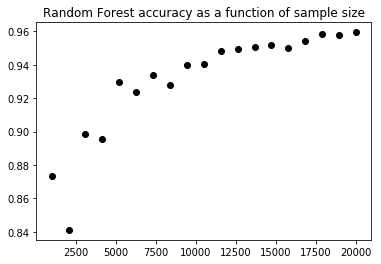

In [110]:
import matplotlib.pyplot as plt 
print(scores)
LR_Score = [0.7666666666666667, 0.7742105263157895,
            0.7724074074074074, 0.7729411764705882,
            0.7716666666666666, 0.7717777777777778,
            0.7647619047619048, 0.7648717948717949,
            0.7694444444444445, 0.7603030303030303,
            0.7673333333333333, 0.774074074074074,
            0.7704166666666666, 0.7738095238095238,
            0.7716666666666666, 0.7526666666666667,
            0.7666666666666667, 0.7322222222222222,
            0.7783333333333333]
RF_Score = [0.9595, 0.9580701754385965, 0.9585185185185185, 0.9541176470588235, 0.9497916666666667,
            0.9517777777777777, 0.9507142857142857, 0.9492307692307692, 0.9480555555555555,
            0.9403030303030303, 0.9396666666666667, 0.9281481481481482, 0.9341666666666667, 
            0.9238095238095239, 0.9294444444444444, 0.8953333333333333, 0.8983333333333333, 
            0.8411111111111111, 0.8733333333333333]
x = np.linspace(20000, 1000, 19)
y = np.array(scores)
x_RF = np.linspace(0, 1, 19)
y_RF = np.array(RF_Score)


plt.plot(x, RF_Score, 'o', color='black' )
plt.title('Random Forest accuracy as a function of sample size')
print(RF_Score)